In [28]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.io as pio
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
pd.set_option('display.max_columns', None)


In [7]:
df=pd.read_csv("speed_dating.csv", encoding= 'unicode_escape')
df.shape

(8378, 195)

In [22]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print("Number of columns : {}".format(df.shape[1]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Missing values per column: ")
display((df.isnull().sum()).sort_values(ascending=False))

Number of rows : 8378
Number of columns : 195

Display of dataset: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9


Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Missing values per column: 


num_in_3    7710
numdat_3    6882
expnum      6578
sinc7_2     6423
amb7_2      6423
            ... 
wave           0
condtn         0
idg            0
gender         0
dec            0
Length: 195, dtype: int64

In [25]:
# Participant Demographics
gender_counts = df[['iid', 'gender']].drop_duplicates()['gender'].value_counts().rename({0: 'Female', 1: 'Male'})
fig = px.pie(names=gender_counts.index, values=gender_counts.values, title='Gender Distribution')
fig.show()

race_counts = df[['iid', 'race']].drop_duplicates()['race'].value_counts().rename({1: 'Black/African American', 2: 'European/Caucasian-American', 3: 'Latino/Hispanic American', 4: 'Asian/Pacific Islander/Asian-American', 6: 'Other'})
fig = px.pie(names=race_counts.index, values=race_counts.values, title='Race Distribution')
fig.show()


In [29]:
# Males and Females: Importance of Race and Religion
df_imprace_gender = df[['iid', 'imprace', 'gender']].drop_duplicates().groupby('gender')['imprace'].mean().rename({0: 'Female', 1: 'Male'})
df_imprelig_gender = df[['iid', 'imprelig', 'gender']].drop_duplicates().groupby('gender')['imprelig'].mean().rename({0: 'Female', 1: 'Male'})

fig = go.Figure()
fig.add_trace(go.Bar(x=df_imprace_gender.index, y=df_imprace_gender.values, name='Race Importance'))
fig.add_trace(go.Bar(x=df_imprelig_gender.index, y=df_imprelig_gender.values, name='Religion Importance'))
fig.update_layout(title='Importance of Race and Religion by Gender', barmode='group')
fig.show()


In [30]:
# Goals by Gender
goals = {
    1: 'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Other'
}
df_goal_gender = df[['iid', 'goal', 'gender']].drop_duplicates()
df_goal_gender['goal'] = df_goal_gender['goal'].replace(goals)
df_goal_gender['gender'] = df_goal_gender['gender'].replace({0: 'Female', 1: 'Male'})
goal_counts_gender = df_goal_gender.groupby(['goal', 'gender']).size().reset_index(name='counts')

fig = px.bar(goal_counts_gender, x='goal', y='counts', color='gender', barmode='group', title='Goals by Gender')
fig.show()


In [31]:
# Hobbies by Gender
hobby_columns = {
    'sports': 'Playing sports/athletics',
    'tvsports': 'Watching sports',
    'exercise': 'Body building/exercising',
    'dining': 'Dining out',
    'museums': 'Museums/galleries',
    'art': 'Art',
    'hiking': 'Hiking/camping',
    'gaming': 'Playing video/board games',
    'clubbing': 'Dancing/clubbing',
    'reading': 'Reading',
    'tv': 'Watching TV',
    'theater': 'Theater',
    'movies': 'Movies',
    'concerts': 'Going to concerts',
    'music': 'Listening to music',
    'shopping': 'Shopping',
    'yoga': 'Yoga/meditation'
}

df_hobbies = df[list(hobby_columns.keys()) + ['gender']]
df_hobbies.columns = list(hobby_columns.values()) + ['gender']
df_hobbies['gender'] = df_hobbies['gender'].replace({0: 'Female', 1: 'Male'})

hobby_means_gender = df_hobbies.groupby('gender').mean().T.reset_index().rename(columns={'index': 'hobby'})

fig = px.bar(hobby_means_gender, x='hobby', y=['Female', 'Male'], barmode='group', title='Hobbies by Gender')
fig.show()


/var/folders/5q/4k55d_7j1kq3rt9wy30qwsk40000gn/T/ipykernel_16816/1475977233.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# Women Receiving More Second Dates
df_second_dates = df.groupby('gender')['dec_o'].mean().rename({0: 'Female', 1: 'Male'})
fig = px.bar(x=df_second_dates.index, y=df_second_dates.values, title='Average Second Date Acceptance Rate by Gender')
fig.show()

# Desirable attributes in a male and female partner

In [56]:
# Create the Radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=df_attr_males.values,
    theta=df_attr_males.index,
    fill='toself',
    name='Male',
    line=dict(color='royalblue', width=1),
    marker=dict(color='rgba(65, 105, 225, 0.5)')
))

fig.add_trace(go.Scatterpolar(
    r=df_attr_females.values,
    theta=df_attr_females.index,
    fill='toself',
    name='Female',
    line=dict(color='crimson', width=1),
    marker=dict(color='rgba(220, 20, 60, 0.5)')
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(df_attr_males.max(), df_attr_females.max())]
        )),
    showlegend=True,
    title='Least Desirable Attributes in Partners by Gender',
    template='plotly_dark'
)

fig.show()


# Question 2: Importance of attractiveness vs. its real impact

In [17]:

importance = df.loc[:, ['iid', 'attr1_1']].groupby('iid').mean().mean()[0]
real_impact = df.loc[:, ['iid', 'attr_o']].groupby('iid').mean().mean()[0]

fig = px.bar(x=['Importance', 'Real Impact'], y=[importance, real_impact], title='Attractiveness: Importance vs. Real Impact', labels={'x': 'Importance vs. Real Impact', 'y': 'Average rating'}, template='plotly_dark')
fig.show()


# Shared interests vs. shared racial background

In [19]:

shared_interests = df['shar1_1'].mean()
shared_race = df['imprace'].mean()

fig = px.bar(x=['Shared Interests', 'Shared Racial Background'], y=[shared_interests, shared_race], title='Shared Interests vs. Shared Racial Background', labels={'x': 'Shared Interests vs. Shared Racial Background', 'y': 'Average rating'}, template='plotly_dark')
fig.show()


# à modif

In [52]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('speed_dating.csv', encoding='latin1')

# Filter the data by gender
df_women = df[df['gender'] == 0]
df_men = df[df['gender'] == 1]

# Define the column labels
column_labels = {
    'attr': 'Attractive',
    'sinc': 'Sincere',
    'intel': 'Intelligent',
    'fun': 'Fun',
    'amb': 'Ambitious',
    'shar': 'Shared Interests',
    'age': 'Age'
}

# Create an imputer for handling missing values
imputer = SimpleImputer(strategy='mean')

# Fit separate models for women and men
X_women = df_women[list(column_labels.keys())]
y_women = df_women['dec_o']

X_men = df_men[list(column_labels.keys())]
y_men = df_men['dec_o']

# Impute missing values
X_women_imputed = imputer.fit_transform(X_women)
X_men_imputed = imputer.fit_transform(X_men)

X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(X_women_imputed, y_women, test_size=0.2, random_state=42)
X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X_men_imputed, y_men, test_size=0.2, random_state=42)

# Fit separate linear regression models for women and men
linear_model_women = LinearRegression()
linear_model_men = LinearRegression()

linear_model_women.fit(X_train_women, y_train_women)
linear_model_men.fit(X_train_men, y_train_men)

# Get the coefficients for both genders
coefs_women = pd.DataFrame(linear_model_women.coef_.reshape(-1, 1), index=X_women.columns, columns=['Coefficient'])
coefs_men = pd.DataFrame(linear_model_men.coef_.reshape(-1, 1), index=X_men.columns, columns=['Coefficient'])

# Replace the index with the correct labels
coefs_women.index = [column_labels[col] for col in coefs_women.index]
coefs_men.index = [column_labels[col] for col in coefs_men.index]

# Display the coefficients for both genders
print("Coefficients for Women (Linear Regression):")
print(coefs_women)

print("\nCoefficients for Men (Linear Regression):")
print(coefs_men)

Coefficients for Women (Linear Regression):
                  Coefficient
Attractive          -0.027709
Sincere              0.013743
Intelligent          0.021170
Fun                  0.008408
Ambitious           -0.007069
Shared Interests     0.010428
Age                 -0.005851

Coefficients for Men (Linear Regression):
                  Coefficient
Attractive          -0.037777
Sincere              0.024309
Intelligent          0.014224
Fun                  0.013101
Ambitious            0.000721
Shared Interests     0.014640
Age                 -0.003903


                  Effect_male  Effect_female
Attractive           0.114200       0.067868
Sincere             -0.023639      -0.008568
Intelligent         -0.004163       0.015477
Fun                  0.043029       0.039537
Ambitious           -0.022763      -0.022263
Shared Interests     0.041058       0.041566
Age                 -0.002538       0.000532


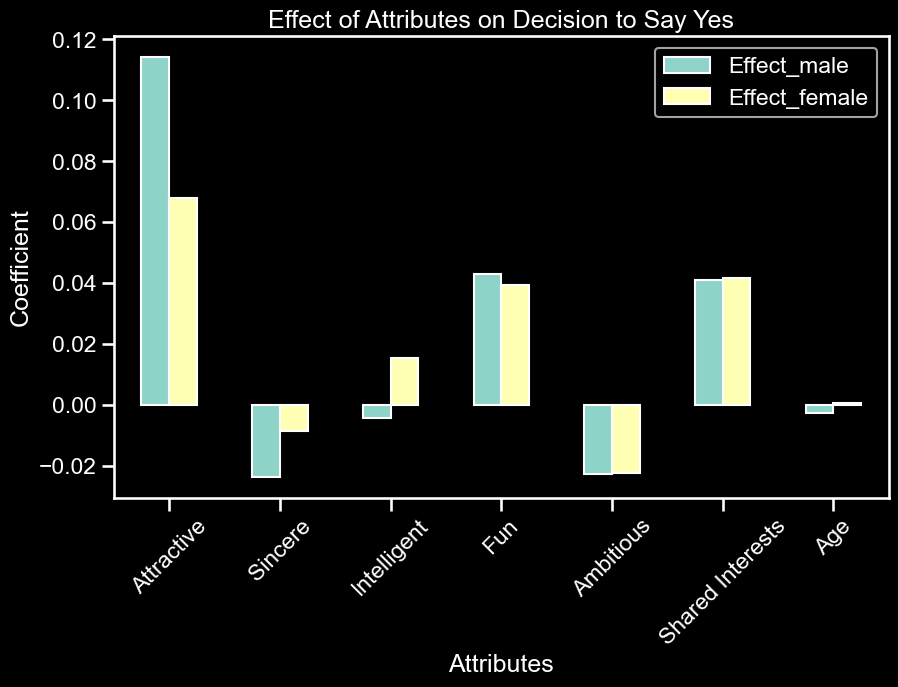

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Subset data by gender
data_f = df[df['gender'] == 0]
data_m = df[df['gender'] == 1]

numerical_features = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'age']
categorical_features = []

X_data_f = data_f[numerical_features + categorical_features]
X_data_m = data_m[numerical_features + categorical_features]

imp_f_mean = SimpleImputer(strategy='mean')
imp_m_mean = SimpleImputer(strategy='mean')

X_data_f = imp_f_mean.fit_transform(X_data_f)
X_data_m = imp_m_mean.fit_transform(X_data_m)

# Fit linear regression models
model_f = LinearRegression().fit(X_data_f, data_f['dec'])
model_m = LinearRegression().fit(X_data_m, data_m['dec'])

# Compute effect sizes
effect_sizes_f = model_f.coef_
effect_sizes_m = model_m.coef_

# Combine effect sizes for male and female models into one table
effect_sizes = pd.DataFrame({'Effect_male': effect_sizes_m, 'Effect_female': effect_sizes_f}, index=['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests', 'Age'])

# Display the coefficients
print(effect_sizes)

# Plot the coefficients
effect_sizes.plot(kind='bar', figsize=(10, 6))
plt.title('Effect of Attributes on Decision to Say Yes')
plt.xlabel('Attributes')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

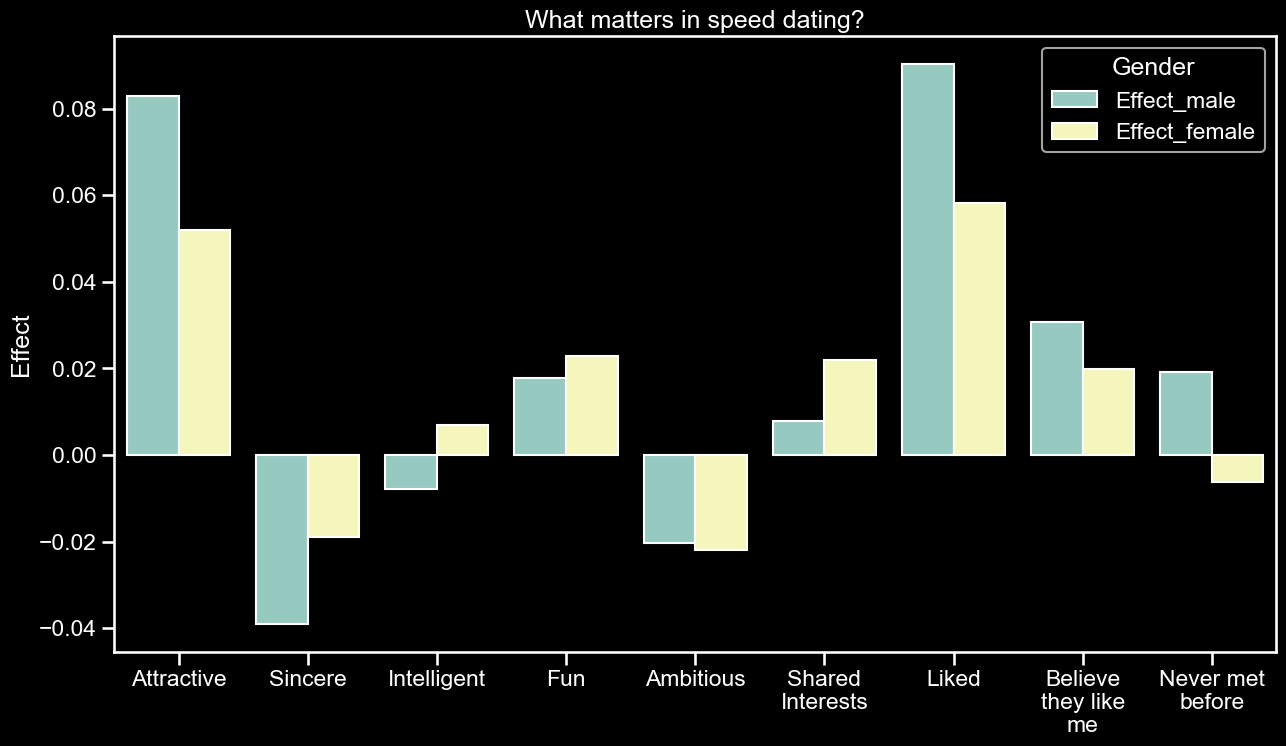

In [53]:
# Subset data by gender
data_f = df[df['gender'] == 0]
data_m = df[df['gender'] == 1]

numerical_features = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']
categorical_features = []

X_data_f = data_f[numerical_features + categorical_features]
X_data_m = data_m[numerical_features + categorical_features]

imp_f_mean = SimpleImputer(strategy='mean')
imp_m_mean = SimpleImputer(strategy='mean')

X_data_f = imp_f_mean.fit_transform(X_data_f)
X_data_m = imp_m_mean.fit_transform(X_data_m)

# Fit linear regression models
model_f = LinearRegression().fit(X_data_f, data_f['dec'])
model_m = LinearRegression().fit(X_data_m, data_m['dec'])

# Compute effect sizes
effect_sizes_f = model_f.coef_
effect_sizes_m = model_m.coef_

# Combine effect sizes for male and female models into one table
effect_sizes = pd.DataFrame({'Effect_male': effect_sizes_m, 'Effect_female': effect_sizes_f}, index=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'])

# Melt table for plotting
chart_data = effect_sizes.reset_index().melt(id_vars='index', var_name='Gender', value_name='Effect')

# Add column for factor
chart_data['Factor'] = chart_data['index'].replace({'attr': 'Attractive',
                                                    'sinc': 'Sincere',
                                                    'intel': 'Intelligent',
                                                    'fun': 'Fun',
                                                    'amb': 'Ambitious',
                                                    'shar': 'Shared\nInterests',
                                                    'like': 'Liked',
                                                    'prob': 'Believe\nthey like\nme',
                                                    'met': 'Never met\nbefore'})

# Plot results

# Set figure size
plt.figure(figsize=(15, 8))
sns.barplot(data=chart_data[chart_data['index'] != 'Intercept'], 
            x='Factor', y='Effect', hue='Gender', dodge=True)
plt.xlabel('')
plt.title('What matters in speed dating?')
plt.show()

# First speed date vs. last speed date of the night

In [38]:
# Question 5: First speed date vs. last speed date of the night
df_order = df[['iid', 'order', 'dec_o', 'gender']]
df_order['last_order'] = df_order.groupby('iid')['order'].transform('max')
df_order['position'] = np.where(df_order['order'] == 1, 'First', np.where(df_order['order'] == df_order['last_order'], 'Last', 'Middle'))

first_last_middle = df_order.groupby(['position', 'gender'])['dec_o'].mean().reset_index()

# Rename gender column values
first_last_middle['gender'] = first_last_middle['gender'].replace({0: 'Female', 1: 'Male'})

# Create separate pie charts for each position
for position in first_last_middle['position'].unique():
    fig = px.pie(
        first_last_middle[first_last_middle['position'] == position],
        values='dec_o',
        names='gender',
        title=f"{position} Speed Date Success Rates"
    )
    fig.show()


/var/folders/5q/4k55d_7j1kq3rt9wy30qwsk40000gn/T/ipykernel_16816/3520328259.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5q/4k55d_7j1kq3rt9wy30qwsk40000gn/T/ipykernel_16816/3520328259.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
# Shortened career mapping
career_mapping_short = {1: 'Lawyer', 2: 'Academic', 3: 'Psychologist', 4: 'Doctor',
                        5: 'Engineer', 6: 'Creative Arts', 7: 'Business',
                        8: 'Real Estate', 9: 'Intl Affairs', 10: 'Undecided',
                        11: 'Social Work', 12: 'Speech Path', 13: 'Politics', 14: 'Pro sports',
                        15: 'Other', 16: 'Journalism', 17: 'Architecture'}

# Map career codes to shortened career names
df_filtered_career['career_name'] = df_filtered_career['career_c'].map(career_mapping_short)

# Calculate the average decision by intended career
career_decision = df_filtered_career.groupby('career_name')['dec'].mean().reset_index()

# Horizontal bar chart
fig = px.bar(career_decision, x='dec', y='career_name', orientation='h', title='Second date acceptance by intended career', labels={'career_name': 'Intended Career', 'dec': 'Average Acceptance Rate'}, template='plotly_dark')
fig.update_yaxes(categoryorder='total ascending')  # Sort bars by total value
fig.show()

Academic         2320
Business         2170
Creative Arts     724
Lawyer            675
Intl Affairs      547
Doctor            421
Undecided         379
Psychologist      261
Engineer          234
Social Work       220
Politics           81
Other              77
Journalism         44
Real Estate        39
Speech Path        28
Pro sports         10
Architecture       10
Name: career_name, dtype: int64
